# Configurando o SRC
- Quando um GeoDataFrame é criado a partir de um shapefile, o SRC jé é importado


In [9]:
import geopandas as gpd
import pandas as pd
regions = gpd.read_file('/home/lucas/Python/dados/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp')
print(regions.crs)


epsg:32630


 European Petroleum Survey Group (EPSG)
 
 Projeção de mercator - preserva os ângulos e distorce levemente as áreas
 Quando um GeoDataFrame a partir de um arquivo em CSV, o src deve ser setado. Nesse caso ESPG 4632 coordenadas de latitude e longitude

In [10]:
#Criar um DataFrame com unidades de saude em Gana
facilities_df = pd.read_csv("/home/lucas/Python/dados/ghana/ghana/health_facilities.csv")
facilities_df.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [11]:
#Converter pra GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))   
#Configurar o SRC
facilities.crs = {'init': 'epsg:4326'}
facilities.head()

/home/lucas/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


# Reprojetando 
Se refere ao processo de mudança do SRC. Isso é feito a partir do método to_crs()
Quando utilizando vários GeoDataFrames é importante que todos usem o mesmo SRC.

<AxesSubplot:>

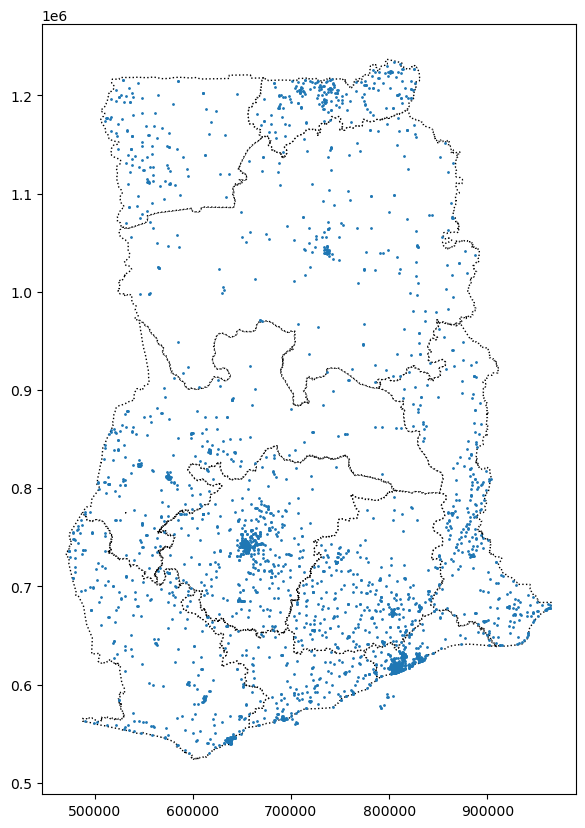

In [12]:
#Criando o mapa
base = regions.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=base)

O método to_crs() modifica apenas a coluna da geometria e mantém as outras da mesma maneira.

In [13]:
facilities.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)


In [14]:
facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


# Atributos de objetos geométricos
Todos os três tipos de objetos geométricos possuem atributos integrados que você pode usar para analisar rapidamente o conjunto de dados. Por exemplo, você pode obter as coordenadas x e y de um ponto a partir dos atributos x e y, respectivamente.

In [15]:
#Pega a coordenada x de cada ponto
facilities.geometry.head().x

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

É possível obter o comprimento de uma linha pelo atributo lenght
É possível obter a área do polígono pelo atributo area

In [16]:
#Calcular a área (metros quadrados) de cada polígono no GeoDataFrame
regions.loc[:, "AREA"] = regions.geometry.area / 10**6
print("Área de Gana: {} quilômetros quadrados".format(regions.AREA.sum()))
print("SRC:", regions.crs)
regions.head()

Área de Gana: 239584.5760055668 quilômetros quadrados
SRC: epsg:32630


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145


Como a região do GeoDataFrame é a ESPG 32630 que é uma projeção de Mercator, o cálculo da área é um pouco menos preciso
Área correta = 238.533 km²